In [6]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
# ignore all warnings
warnings. filterwarnings("ignore")

In [7]:
df=pd.read_csv("mergedDataset.csv")
df.shape

(1185, 34)

In [8]:
df

,university,year,rank_display,score,link,country,city,region,logo,type,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Massachusetts Institute of Technology (MIT),2021,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Stanford University,2021,2,98.4,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harvard University,2021,3,97.9,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,California Institute of Technology (Caltech),2021,4,97.0,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,University of Oxford,2021,5,96.7,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...,Public,...,8.5685,7.97,6.6380,7.55375,5.4380,5.9545,6.1545,5.495,8.2580,2.6290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Weizmann Institute of Science,2021,NaN,NaN,https://www.topuniversities.com/universities/w...,Israel,Rehovot,Asia,https://www.topuniversities.com/sites/default/...,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181,Universitatea de Vest din Timisoara / West Un...,2021,1001,NaN,https://www.topuniversities.com/universities/u...,Romania,Timișoara,Europe,https://www.topuniversities.com/sites/default/...,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1182,WHU - Otto Beisheim School of Management,2021,NaN,69.6,https://www.topuniversities.com/universities/w...,Germany,Vallendar,Europe,https://www.topuniversities.com/sites/default/...,Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183,Yarmouk University,2021,1001,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dtypes

university                 object
year                        int64
rank_display               object
score                     float64
link                       object
country                    object
city                       object
region                     object
logo                       object
type                       object
research_output            object
student_faculty_ratio     float64
international_students     object
size                       object
faculty_count              object
Unnamed: 0                float64
UA_Continent               object
Housing                   float64
Cost of Living            float64
Startups                  float64
Venture Capital           float64
Travel Connectivity       float64
Commute                   float64
Business Freedom          float64
Safety                    float64
Healthcare                float64
Education                 float64
Environmental Quality     float64
Economy                   float64
Taxation      

In [10]:
df.isnull().sum()

university                  0
year                        0
rank_display               27
score                     679
link                        0
country                     0
city                       40
region                      0
logo                        0
type                        4
research_output             1
student_faculty_ratio      17
international_students     36
size                        1
faculty_count              15
Unnamed: 0                830
UA_Continent              830
Housing                   830
Cost of Living            830
Startups                  830
Venture Capital           830
Travel Connectivity       830
Commute                   830
Business Freedom          830
Safety                    830
Healthcare                830
Education                 830
Environmental Quality     830
Economy                   830
Taxation                  830
Internet Access           830
Leisure & Culture         830
Tolerance                 830
Outdoors  

In [11]:
data = df.drop(["logo", "link","UA_Continent","score"], axis=1)
data

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Massachusetts Institute of Technology (MIT),2021,1,United States,Cambridge,North America,Private,Very High,4.0,"3,730",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Stanford University,2021,2,United States,Stanford,North America,Private,Very High,3.0,"3,879",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harvard University,2021,3,United States,Cambridge,North America,Private,Very High,5.0,"5,877",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,California Institute of Technology (Caltech),2021,4,United States,Pasadena,North America,Private,Very High,2.0,692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,University of Oxford,2021,5,United Kingdom,Oxford,Europe,Public,Very High,3.0,"8,442",...,8.5685,7.97,6.6380,7.55375,5.4380,5.9545,6.1545,5.495,8.2580,2.6290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Weizmann Institute of Science,2021,NaN,Israel,Rehovot,Asia,Public,Very High,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181,Universitatea de Vest din Timisoara / West Un...,2021,1001,Romania,Timișoara,Europe,Public,High,21.0,799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1182,WHU - Otto Beisheim School of Management,2021,NaN,Germany,Vallendar,Europe,Private,Very High,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183,Yarmouk University,2021,1001,Jordan,Irbid,Asia,Public,Medium,31.0,"2,826",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data['international_students'] = pd.to_numeric(data['international_students'], errors="coerce")

In [13]:
data['international_students'] = data['international_students'].astype(float)

In [14]:
data['faculty_count'] = pd.to_numeric(data['faculty_count'], errors="coerce")

In [15]:
data['faculty_count'] = data['faculty_count'].astype(float)

In [16]:
data.dropna(subset=['Unnamed: 0'], inplace=True)
#data.drop('Unnamed: 0', inplace=True, axis=1)
data

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
4,University of Oxford,2021,5,United Kingdom,Oxford,Europe,Public,Very High,3.0,NaN,...,8.5685,7.970000,6.6380,7.55375,5.4380,5.9545,6.1545,5.4950,8.2580,2.6290
6,University of Cambridge,2021,7,United Kingdom,Cambridge,Europe,Public,Very high,4.0,NaN,...,9.5045,8.189000,6.5545,8.01650,5.4380,5.9545,5.8095,2.4550,8.4870,0.5000
7,Imperial College London,2021,8,United Kingdom,London,Europe,Public,Very High,5.0,NaN,...,7.2435,8.018000,9.0270,5.54775,5.4380,5.9545,5.8455,9.4555,6.5730,5.3745
9,UCL,2021,10,United Kingdom,London,Europe,Public,Very High,5.0,NaN,...,7.2435,8.018000,9.0270,5.54775,5.4380,5.9545,5.8455,9.4555,6.5730,5.3745
10,National University of Singapore (NUS),2021,11,Singapore,Singapore,Asia,Public,Very High,7.0,NaN,...,9.9715,7.682667,8.2465,7.95425,7.4785,9.9590,8.4470,7.4225,6.4950,5.8340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,University of the Western Cape,2021,1001,South Africa,Cape Town,Africa,Public,High,24.0,NaN,...,5.3280,4.343000,0.8945,6.60850,2.7680,5.1510,5.6125,4.7360,3.6605,6.7505
1175,University POLITEHNICA of Bucharest,2021,1001,Romania,Bucharest,Europe,Public,Very High,24.0,922.0,...,8.9860,6.075333,2.4475,3.41925,4.1030,6.8390,9.6380,6.9595,8.6865,1.9675
1176,Université de Toulouse II-Le Mirail,2021,1001,France,Toulouse,Europe,Public,High,58.0,NaN,...,6.9670,8.832000,4.4420,5.07975,4.2045,2.6480,4.6220,4.1370,7.6335,3.3040
1179,Warsaw University of Life Sciences – SGGW (WUL...,2021,1001,Poland,Warsaw,Europe,Public,Very High,12.0,NaN,...,8.6995,6.881667,4.6685,6.38900,4.7615,5.0970,6.0000,7.3355,4.6360,4.9610


In [17]:
data.isnull().sum()

university                  0
year                        0
rank_display               12
country                     0
city                        0
region                      0
type                        2
research_output             1
student_faculty_ratio       7
international_students    166
size                        1
faculty_count             165
Unnamed: 0                  0
Housing                     0
Cost of Living              0
Startups                    0
Venture Capital             0
Travel Connectivity         0
Commute                     0
Business Freedom            0
Safety                      0
Healthcare                  0
Education                   0
Environmental Quality       0
Economy                     0
Taxation                    0
Internet Access             0
Leisure & Culture           0
Tolerance                   0
Outdoors                    0
dtype: int64

In [18]:
data.shape

(355, 30)

In [19]:
data["rank_display"]= data["rank_display"].fillna("1001")

In [20]:
data.dropna(inplace=True)

In [21]:
data.shape

(166, 30)

In [22]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [23]:
data.columns

Index(['university', 'year', 'rank_display', 'country', 'city', 'region',
       'type', 'research_output', 'student_faculty_ratio',
       'international_students', 'size', 'faculty_count', 'Housing',
       'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity',
       'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education',
       'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
       'Leisure & Culture', 'Tolerance', 'Outdoors'],
      dtype='object')

In [24]:
data = data.loc[~((df['university'] == 0) | (df['year'] == 0) | (df['rank_display'] == 0) | 
(df['country'] == 0) | (df['city'] == 0) | (df['region'] == 0) | (df['type'] == 0) | 
(df['research_output'] == 0) | (df['student_faculty_ratio'] == 0) | (df['international_students'] == 0) | 
(df['size'] == 0) | (df['faculty_count'] == 0) | (df['Housing'] == 0) | (df['Cost of Living'] == 0) | 
(df['Startups'] == 0) | (df['Venture Capital'] == 0) | (df['Travel Connectivity'] == 0) | 
(df['Commute'] == 0) | (df['Business Freedom'] == 0) | (df['Safety'] == 0) | (df['Healthcare'] == 0) | 
(df['Education'] == 0) | (df['Environmental Quality'] == 0) | (df['Economy'] == 0) |
(df['Taxation'] == 0) | (df['Internet Access'] == 0) | (df['Leisure & Culture'] == 0) | 
(df['Tolerance'] == 0) | (df['Outdoors'] == 0) | (df['UA_Continent']==0)| (df['score']==0))]

In [25]:
data=data.reset_index()



In [26]:
data.drop('index', inplace=True, axis=1)
data

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,École Normale Supérieure de Lyon,2021,161,France,Lyon,Europe,Public,Very High,5.0,233.000,...,7.1345,8.641667,4.5805,6.54325,4.2045,2.6480,9.4030,5.9875,6.5170,5.3735
1,Ecole des Ponts ParisTech,2021,242,France,Paris,Europe,Public,Very High,6.0,735.000,...,6.2465,8.207667,7.0850,4.36225,4.2045,2.6480,9.7160,9.8165,5.5790,4.4330
2,Indian Institute of Technology Madras (IITM),2021,275,India,Chennai,Asia,Public,Very High,11.0,94.000,...,7.8370,4.074667,0.5115,2.39450,5.5565,3.4145,6.8255,2.2275,4.5500,4.1980
3,Goethe-University Frankfurt am Main,2021,311,Germany,Frankfurt,Europe,Public,Very High,12.0,6.749,...,6.8375,7.707333,5.2065,6.47550,5.3735,3.9035,4.0790,6.4920,7.0345,5.3840
4,Ewha Womans University,2021,333,South Korea,Seoul,Asia,Private,High,7.0,2.105,...,8.3050,8.549000,6.8655,6.78700,5.5610,6.6075,7.6370,8.2000,4.4840,5.7760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Russian State University for the Humanities,2021,1001,Russia,Moscow,Europe,Public,High,13.0,475.000,...,7.4780,4.763000,4.5725,5.27475,3.1480,6.0170,6.5710,8.8755,3.4750,5.0900
114,Seoul National University of Science and Techn...,2021,1001,South Korea,Seoul,Asia,Public,Very High,17.0,722.000,...,8.3050,8.549000,6.8655,6.78700,5.5610,6.6075,7.6370,8.2000,4.4840,5.7760
115,Universidad de Lima,2021,1001,Peru,Lima,Latin America,Private,Medium,23.0,264.000,...,5.2905,5.710667,0.5000,2.48075,3.1625,6.5240,2.4100,6.8085,6.0805,5.3880
116,Universidad Nacional Agraria la Molina,2021,1001,Peru,Lima,Latin America,Public,High,13.0,179.000,...,5.2905,5.710667,0.5000,2.48075,3.1625,6.5240,2.4100,6.8085,6.0805,5.3880


In [27]:
data.select_dtypes('object').nunique()

university         118
rank_display        42
country             36
city                51
region               6
type                 2
research_output      4
size                 4
dtype: int64

In [28]:
catColumnsPos = [data.columns.get_loc(col) for col in list(data.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(data.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))


Categorical columns           : ['university', 'rank_display', 'country', 'city', 'region', 'type', 'research_output', 'size']
Categorical columns position  : [0, 2, 3, 4, 5, 6, 7, 10]


In [29]:
# Convert dataframe to matrix
dfMatrix = data.to_numpy()
dfMatrix

array([['École Normale Supérieure de Lyon', 2021, '161', ...,
        5.987500000000001, 6.517, 5.373500000000001],
       ['Ecole des Ponts ParisTech', 2021, '242', ..., 9.8165, 5.579,
        4.433],
       ['Indian Institute of Technology Madras (IITM)', 2021, '275', ...,
        2.2275, 4.550000000000001, 4.198],
       ...,
       ['Universidad de Lima', 2021, '1001', ..., 6.8085, 6.0805,
        5.388000000000001],
       ['Universidad Nacional Agraria la Molina', 2021, '1001', ...,
        6.8085, 6.0805, 5.388000000000001],
       ['Universidad Nacional de San Martín (UNSAM)', 2021, '1001', ...,
        7.6735, 8.584000000000001, 4.535500000000001]], dtype=object)

Text(0, 0.5, 'Cost')

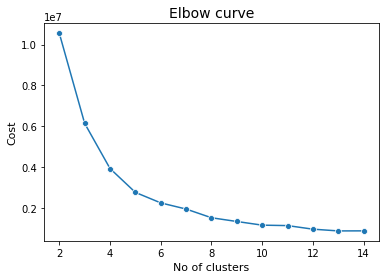

In [30]:
import seaborn as sns
num_clusters = list(range(2, 15))
cost_values = []
# calculate cost values for each number of clusters (2 to 15)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(dfMatrix, categorical= catColumnsPos)
    cost_values.append(kproto.cost_)
# plot cost against number of clusters
ax = sns.lineplot(x=num_clusters, y=cost_values, marker="o")
ax.set_title('Elbow curve', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Cost', fontsize=11)

In [31]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 14, init = 'Huang', random_state = 0)
clusters=kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [32]:
# Cluster centorid
print(kprototype.cluster_centroids_)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
print(kprototype.cost_)

[['2021.0' '23.666666666666668' '707.6666666666666' '295.0'
  '7.004166666666667' '5.698333333333333' '6.3455' '5.222333333333334'
  '5.225833333333333' '5.494250000000001' '7.462222222222221'
  '7.4768333333333326' '7.575666666666667' '5.200833333333334'
  '5.330000000000001' '3.903166666666667' '4.051833333333334'
  '5.715333333333334' '8.238666666666667' '6.561833333333333' '5.1505'
  'Athens University of Economics and Business' '801-1000' 'Estonia'
  'Athens' 'Europe' 'Public' 'Very High' 'M']
 ['2021.0' '12.75' '789.75' '4.4' '8.012875000000001' '6.7005' '4.46275'
  '2.5217500000000004' '3.1895000000000002' '5.099125000000001' '6.205'
  '7.605625' '7.421999999999999' '2.9285' '6.1234375000000005' '2.857125'
  '5.308625' '4.294875' '6.486000000000001' '7.7120000000000015'
  '5.102375' 'Kasetsart University' '801-1000' 'Argentina' 'Bangkok'
  'Europe' 'Public' 'High' 'XL']
 ['2021.0' '14.5' '396.0' '203.5' '8.812000000000001' '7.763999999999999'
  '4.672999999999999' '2.31000000000

In [33]:
# Add the cluster to the dataframe
data['Cluster Labels'] = kprototype.labels_
data['Segment'] = data['Cluster Labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth',4:'Fifth',5:'Sixth',6:'Seventh',7:'Eight',8:'Ninth',9:'Ten',10:'Eleventh',11:'Twelve',12:'Thirteen',13:'Fourteen'})
# Order the cluster
data['Segment'] = data['Segment'].astype('category')
data['Segment'] = data['Segment'].cat.reorder_categories(['First','Second','Third','Fourth','Fifth','Sixth','Seventh','Eight','Ninth','Ten','Eleventh','Twelve','Thirteen','Fourteen'])

In [34]:
data.head()

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,...,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Cluster Labels,Segment
0,École Normale Supérieure de Lyon,2021,161,France,Lyon,Europe,Public,Very High,5.0,233.000,...,4.5805,6.54325,4.2045,2.6480,9.4030,5.9875,6.5170,5.3735,5,Sixth
1,Ecole des Ponts ParisTech,2021,242,France,Paris,Europe,Public,Very High,6.0,735.000,...,7.0850,4.36225,4.2045,2.6480,9.7160,9.8165,5.5790,4.4330,0,First
2,Indian Institute of Technology Madras (IITM),2021,275,India,Chennai,Asia,Public,Very High,11.0,94.000,...,0.5115,2.39450,5.5565,3.4145,6.8255,2.2275,4.5500,4.1980,6,Seventh
3,Goethe-University Frankfurt am Main,2021,311,Germany,Frankfurt,Europe,Public,Very High,12.0,6.749,...,5.2065,6.47550,5.3735,3.9035,4.0790,6.4920,7.0345,5.3840,10,Eleventh
4,Ewha Womans University,2021,333,South Korea,Seoul,Asia,Private,High,7.0,2.105,...,6.8655,6.78700,5.5610,6.6075,7.6370,8.2000,4.4840,5.7760,10,Eleventh


In [35]:
lgbm_data = data.copy()
for c in lgbm_data.select_dtypes(include='object'):
    lgbm_data[c] = lgbm_data[c].astype('category')



In [36]:
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from sklearn.model_selection import cross_val_score
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, kprototype.labels_, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.8466512402062275
